In [175]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Template to Explore Google Removal Requests

### Table of Contents
###### 1. Setup
###### 2. Most frequented Top Level Domains
###### 3. Top copyright infringing Domains
###### 4. Total requests, Removed, Not Removed, Pending
###### 5. .ch, .org & .edu
###### 6. Let user search for specific .ch domains in the data. 


## 1. Setup

In [176]:
df = pd.read_csv("domains_test.csv")

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
Request ID                          10 non-null int64
Domain                              10 non-null object
URLs removed                        10 non-null int64
URLs for which we took no action    10 non-null int64
URLs pending review                 10 non-null int64
From Abuser                         10 non-null object
dtypes: int64(4), object(2)
memory usage: 560.0+ bytes


In [178]:
df.head(10)

,Request ID,Domain,URLs removed,URLs for which we took no action,URLs pending review,From Abuser
0,3490085,jjtorrent.com,13,0,0,f
1,3490085,jotorrent.com,6,0,0,f
2,3490085,jp5959.com,2,0,0,f
3,3490085,jubetv.com,1,0,0,f
4,3490085,justbooklib.com,2,0,0,f
5,3490085,kappator.download,9,0,0,f
6,3490085,kappator.download,3,0,0,f
7,3490085,karlblockphotography.com,3,0,0,f
8,3490085,kaskus.co.id,1,0,0,f
9,3490085,kasstorrent.eu,19,0,0,f


## 2. Looking into the Most Frequently Mentioned Top Level Domains

In [187]:
df['Domain'][0]

'jjtorrent.com'

In [188]:
type(df['Domain'][0])

str

In [189]:
test = df['Domain']

In [195]:
import re
def toplevel_domains(xx):
    if str(xx['Domain']) == 'kappator.download':
        return 'hello'
    else:
        return re.findall('\..+$', xx)[0]
df['Top_Level'] = test.apply(toplevel_domains)

TypeError: string indices must be integers

In [186]:
df.head(10)

,Request ID,Domain,URLs removed,URLs for which we took no action,URLs pending review,From Abuser,Top_Level
0,3490085,jjtorrent.com,13,0,0,f,.com
1,3490085,jotorrent.com,6,0,0,f,.com
2,3490085,jp5959.com,2,0,0,f,.com
3,3490085,jubetv.com,1,0,0,f,.com
4,3490085,justbooklib.com,2,0,0,f,.com
5,3490085,kappator.download,9,0,0,f,.download
6,3490085,kappator.download,3,0,0,f,.download
7,3490085,karlblockphotography.com,3,0,0,f,.com
8,3490085,kaskus.co.id,1,0,0,f,.co.id
9,3490085,kasstorrent.eu,19,0,0,f,.eu


In [113]:
#import re
#def toplevel_domains(xx):
#    return re.findall('\..+$', xx)[0]
#df['Top_Level'] = df['Domain'].apply(toplevel_domains)

In [114]:
#df.head(5)

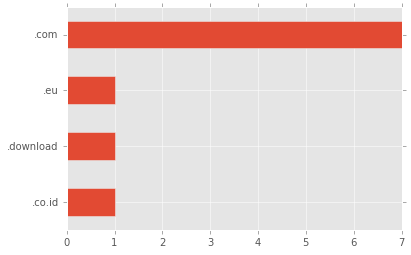

In [118]:
plt.style.use('ggplot')
top_level = df["Top_Level"].value_counts()
top_level.sort_values(ascending=True).tail(10).plot(kind='barh')

plt.savefig("top_level_domains.png")

In [119]:
df["Top_Level"][8]

'.co.id'

## 3. Top copyright infringing Domains

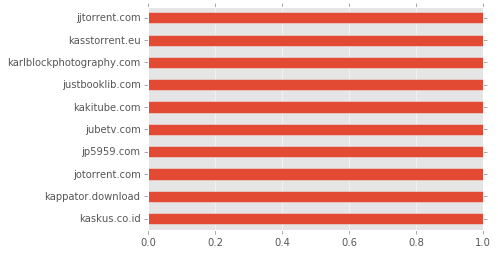

In [120]:
df["Domain"].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.savefig("top_domains.png")

## 4. Total, Removed, Not Removed, Pending

In [121]:
df['Request ID'].count()

10

In [122]:
df['URLs removed'].sum()

59

In [123]:
df['URLs for which we took no action'].sum()

0

In [124]:
df['URLs pending review'].sum()

0

## 5. .ch, .org & .edu

In [125]:
com = df[df['Top_Level'] == '.com']
pd.DataFrame(com).to_csv('com.csv', index=False)

In [127]:
#pd.DataFrame(com).to_csv('com.csv', index=False)

In [128]:
#ch = df[df['Top_Level'] == '(.ch,)']
#pd.DataFrame(ch).to_csv('ch.csv', index=False)
#org = df[df['Top_Level'] == '.org']
#edu = df[df['Top_Level'] == '.edu']

In [130]:
#ch['Domain'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')